# Quantum Teleportation

* Teleporting the information of qubit Q: 1/√2(|0⟩+ |1⟩) to qubit B = |0⟩

In [1]:
#Importing some libraries to encod Teleportation Circuit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

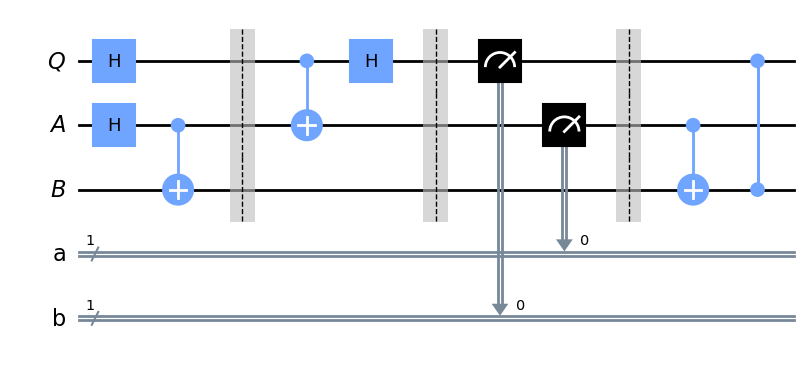

In [2]:
# "qubits"
Qbit = QuantumRegister(1, 'Q')
ebit0 = QuantumRegister(1, 'A')   #ebit stands for Entangled bit
ebit1 = QuantumRegister(1, 'B')

"Cbits"
a = ClassicalRegister(1, 'a')
b = ClassicalRegister(1, 'b')

# A class in which Quantum circuit of teleportation is Coded
class Teleportation_Circuit:
    
    #Initiallizing Qbits and Cbits objeccts
    def __init__(self, Qbit, ebit0, ebit1, a, b):
        self.Qbit = Qbit
        self.ebit0 = ebit0
        self.ebit1 = ebit1
        self.a = a
        self.b = b
    

        self.qc = QuantumCircuit(self.Qbit, self.ebit0, self.ebit1, self.a, self.b)

        self.qc.h(self.Qbit)   # Plus state creation

        "Creating Entangled State of A and B"
        self.qc.h(self.ebit0)
        self.qc.cx(self.ebit0, self.ebit1)
        self.qc.barrier()    
        
        "Applying CNOT to 'ebit'/'A' state using Qbit as  Control"
        self.qc.cx(Qbit, ebit0)
        self.qc.h(Qbit)
        self.qc.barrier()     
        
        'Measuring Qbits to classical bits'
        self.qc.measure(self.Qbit, self.b)
        self.qc.measure(self.ebit0, self.a)
        self.qc.barrier()
        
        "Apply CNOT and CZ gates on ebit1"
        self.qc.cx(self.ebit0, self.ebit1)
        self.qc.cz(self.Qbit, self.ebit1)
    
    #To print the state of ebit1 after Teleportation proccess
    def print_state(self):
        simulator = Aer.get_backend('statevector_simulator')
        result = execute(self.qc, backend = simulator).result()
        statevector = result.get_statevector(self.qc)
        return Statevector(statevector)
    
    def qc_returned(self):
        return self.qc
    
    "Attribute for drawing histogram of Qbits Probability maganitude"
    def histogram(self):
        simulator = Aer.get_backend('qasm_simulator')
        result = execute(self.qc, backend = simulator, shots = 1000).result()
        counts = result.get_counts(self.qc)
        print('Counts', counts)
        return plot_histogram(counts)



#Calling the class Teleportation_Circuit here        
tele = Teleportation_Circuit(Qbit, ebit0, ebit1, a, b)

# Drawing the circuit
tele.qc_returned().draw('mpl')

### Measurement results

Counts {'1 0': 240, '0 0': 253, '0 1': 252, '1 1': 255}


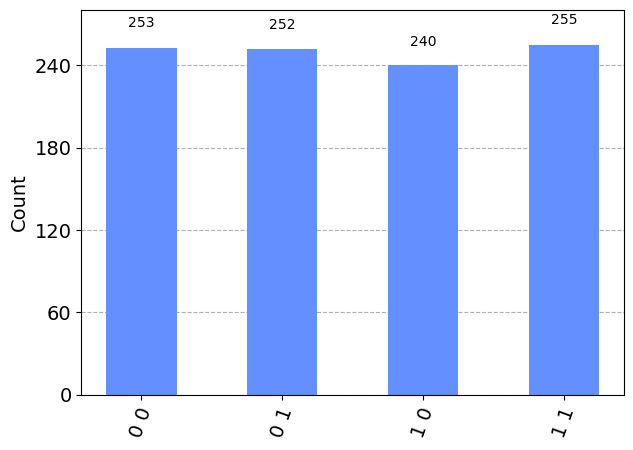

In [3]:
"call the attribute Histogram of Class Teleportation Circuit"
tele.histogram()